In [21]:
#导入包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
# 数据导入
inputpath = '期货量化实践_持仓前50主连数据.xlsx'
df_rank_volume = pd.read_excel(inputpath,sheet_name = '20231023持仓量（单边）')
df_price = pd.read_excel(inputpath,sheet_name = '近2年主力连续')
df_change = pd.read_excel(inputpath,sheet_name = '对应主力')
df_multi = pd.read_excel('合约乘数.xlsx',sheet_name = '主表')

In [23]:
#处理合约乘数
multi = pd.read_excel('合约乘数.xlsx', sheet_name='主表')
# 仅保留名字和合约乘数两列 并去重
multi = multi[['名字', '合约乘数']].drop_duplicates()

In [24]:
#处理持仓量
amount = pd.DataFrame(df_rank_volume.iloc[1:,3])
amount = amount.set_index(df_rank_volume.iloc[1:,1])
amount.columns = ['持仓量']
# index删除'.'之后的部分
amount.index = amount.index.str.split('.').str[0]
# 删除最后一个字母并转大写
amount.index = amount.index.str[:-1].str.upper()
amount.head(5)

,持仓量
日期：2023/10/23,
RB,1953077
TA,1487671
MA,1229352
HC,989599
SA,935196


In [25]:
#处理收盘价
price = pd.DataFrame(df_price.iloc[3:,3::3])
price = price.set_index(df_price.iloc[3:,1])
price.columns = df_price.iloc[0,3::3]
price.columns = price.columns.str.split('.').str[0].str[:-1].str.upper()
price.head(5)

,A,AG,AL,AO,AP,AU,B,BB,BC,BR,...,SR,SS,TA,UR,V,WH,WR,Y,ZC,ZN
Unnamed: 1,,,,,,,,,,,,,,,,,,,,,
2021-10-25,6209,5001,21665,0,8379,370.14,4406,373.3,64420,0,...,5890,20025,5448,2755,10195,2937,5054,9892,1305.6,24700
2021-10-26,6170,4992,21250,0,8431,371.64,4417,373.3,64190,0,...,5929,20270,5460,2783,9775,2905,5145,9998,1237,24435
2021-10-27,6167,4914,20135,0,8283,368.92,4401,373.3,62720,0,...,6078,19630,5258,2532,9105,2923,4822,9896,1144.6,23895
2021-10-28,6143,4925,19920,0,7950,372.56,4347,373.3,63040,0,...,5953,19295,5204,2590,9545,2910,4780,9772,1051.8,23860
2021-10-29,6244,4861,19870,0,7926,370.48,4334,373.3,62400,0,...,5978,19080,5156,2468,9120,2913,4723,9984,973,23470


In [26]:
#处理换月数据
change = pd.DataFrame(df_change.iloc[1:70,3:])
change = change.set_index(df_change.iloc[1:70,0])
change.columns = df_change.iloc[0,3:]
change = change.T
change.columns = change.columns.str.split('.').str[0].str[:-1].str.upper()
change.head(5)

Unnamed: 0,A,AG,AL,AO,AP,AU,B,BB,BC,BR,...,SR,SS,TA,UR,V,WH,WR,Y,ZC,ZN
0,,,,,,,,,,,,,,,,,,,,,
2021-10-25,A2201.DCE,AG2112.SHF,AL2112.SHF,0,AP2201.CZC,AU2112.SHF,B2112.DCE,BB2206.DCE,bc2112.INE,0,...,SR2201.CZC,SS2111.SHF,TA2201.CZC,UR2201.CZC,V2201.DCE,WH2205.CZC,WR2202.SHF,Y2201.DCE,ZC2201.CZC,ZN2111.SHF
2021-10-26,A2201.DCE,AG2112.SHF,AL2112.SHF,0,AP2201.CZC,AU2112.SHF,B2112.DCE,BB2210.DCE,bc2112.INE,0,...,SR2201.CZC,SS2112.SHF,TA2201.CZC,UR2201.CZC,V2201.DCE,WH2205.CZC,WR2202.SHF,Y2201.DCE,ZC2201.CZC,ZN2112.SHF
2021-10-27,A2201.DCE,AG2112.SHF,AL2112.SHF,0,AP2201.CZC,AU2112.SHF,B2112.DCE,BB2210.DCE,bc2112.INE,0,...,SR2201.CZC,SS2112.SHF,TA2201.CZC,UR2201.CZC,V2201.DCE,WH2205.CZC,WR2202.SHF,Y2201.DCE,ZC2201.CZC,ZN2112.SHF
2021-10-28,A2201.DCE,AG2112.SHF,AL2112.SHF,0,AP2201.CZC,AU2112.SHF,B2112.DCE,BB2210.DCE,bc2112.INE,0,...,SR2201.CZC,SS2112.SHF,TA2201.CZC,UR2201.CZC,V2201.DCE,WH2205.CZC,WR2202.SHF,Y2201.DCE,ZC2201.CZC,ZN2112.SHF
2021-10-29,A2201.DCE,AG2112.SHF,AL2112.SHF,0,AP2201.CZC,AU2112.SHF,B2112.DCE,BB2210.DCE,bc2112.INE,0,...,SR2201.CZC,SS2112.SHF,TA2201.CZC,UR2201.CZC,V2201.DCE,WH2205.CZC,WR2202.SHF,Y2201.DCE,ZC2201.CZC,ZN2112.SHF


In [27]:
bool_not_change = (change.shift(1)==change).iloc[1:,:]
bool_not_change.head(5)

Unnamed: 0,A,AG,AL,AO,AP,AU,B,BB,BC,BR,...,SR,SS,TA,UR,V,WH,WR,Y,ZC,ZN
0,,,,,,,,,,,,,,,,,,,,,
2021-10-26,True,True,True,True,True,True,True,False,True,True,...,True,False,True,True,True,True,True,True,True,False
2021-10-27,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2021-10-28,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2021-10-29,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2021-11-01,True,True,True,True,True,True,False,True,False,True,...,True,True,True,True,True,True,True,True,True,True


In [28]:
#计算持仓金额+排序+选出前50
amount['收盘价'] = price.loc['2023-10-23']
amount['合约乘数'] = multi.set_index('名字').loc[amount.index]
amount['持仓金额'] = amount['持仓量']*amount['收盘价']*amount['合约乘数']
amount = amount.sort_values(by = '持仓金额',ascending=False)
choose_50 = amount.iloc[:50,:]
choose_50.head(5)

,持仓量,收盘价,合约乘数,持仓金额
日期：2023/10/23,,,,
AU,155737,476,1000,74130812000
RB,1953077,3572,10,69763910440
I,800950,835,100,66879325000
CU,158801,65640,5,52118488200
CF,616991,15910,5,49081634050


In [29]:
#平滑处理
price_with_smoothness = pd.DataFrame(columns = choose_50.index)
for code in choose_50.index:
    temp = [price[code].iloc[0]]
    date = 1
    while date <price.shape[0]:
        if ~bool_not_change[code].iloc[date-1]:
            diff = price[code].iloc[date-1]-price[code].iloc[date]
            for i in range(4):
                if date+i<price.shape[0]:
                    temp.append(price[code].iloc[date+i]+(8-2*i)/10*diff)
            date = min(date+4,price.shape[0])
        else:
            temp.append(price[code].iloc[date])
            date = date+1
    price_with_smoothness[code] = temp
price_with_smoothness['date'] = price.index
price_with_smoothness = price_with_smoothness.set_index('date')
price_with_smoothness

日期：2023/10/23,AU,RB,I,CU,CF,TA,Y,SR,AG,HC,...,A,SS,ZN,LU,BC,PK,BR,CS,AO,SI
date,,,,,,,,,,,,,,,,,,,,,
2021-10-25,370.14,4825.0,688.5,72110.0,21495.0,5448.0,9892.0,5890.0,5001.0,5180.0,...,6209.0,20025.0,24700.0,3985.0,64420.0,9030.0,0.0,3273.0,0.0,0.0
2021-10-26,371.64,4917.0,714.5,72000.0,21190.0,5460.0,9998.0,5929.0,4992.0,5236.0,...,6170.0,20074.0,24647.0,3950.0,64190.0,8992.0,0.0,3210.0,0.0,0.0
2021-10-27,368.92,4655.0,707.0,70560.0,21125.0,5258.0,9896.0,6078.0,4914.0,5032.0,...,6167.0,19483.0,24054.0,3887.0,62720.0,8836.0,0.0,3192.0,0.0,0.0
2021-10-28,372.56,4712.0,683.5,71110.0,21435.0,5204.0,9772.0,5953.0,4925.0,5063.0,...,6143.0,19197.0,23966.0,3778.0,63040.0,8776.0,0.0,3138.0,0.0,0.0
2021-10-29,370.48,4646.0,637.5,70540.0,21345.0,5156.0,9984.0,5978.0,4861.0,5003.0,...,6244.0,19031.0,23523.0,3872.0,62400.0,8796.0,0.0,3169.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-17,463.40,3647.0,866.0,65880.0,16695.0,5802.0,8068.0,6790.0,5793.0,3766.0,...,4938.0,14785.0,20855.0,4631.0,58280.0,9524.4,12890.0,2924.0,3095.0,14438.0
2023-10-18,467.94,3615.0,861.0,66700.0,16485.0,5800.0,8066.0,6816.0,5855.0,3747.0,...,4929.0,14795.0,21150.0,4682.0,59140.0,9391.2,12590.0,2867.0,3102.0,14684.0
2023-10-19,471.26,3644.0,871.5,66470.0,16445.0,5778.0,8088.0,6878.0,5835.0,3765.0,...,4929.0,14860.0,21015.0,4680.0,58940.0,9300.0,12665.0,2878.0,3125.0,14540.0


In [30]:
with pd.ExcelWriter('换月处理后的期货主连合约收盘价数据.xlsx') as result_file:
    price_with_smoothness.to_excel(result_file,sheet_name='收盘价数据')
    choose_50.to_excel(result_file,sheet_name='50支排名')

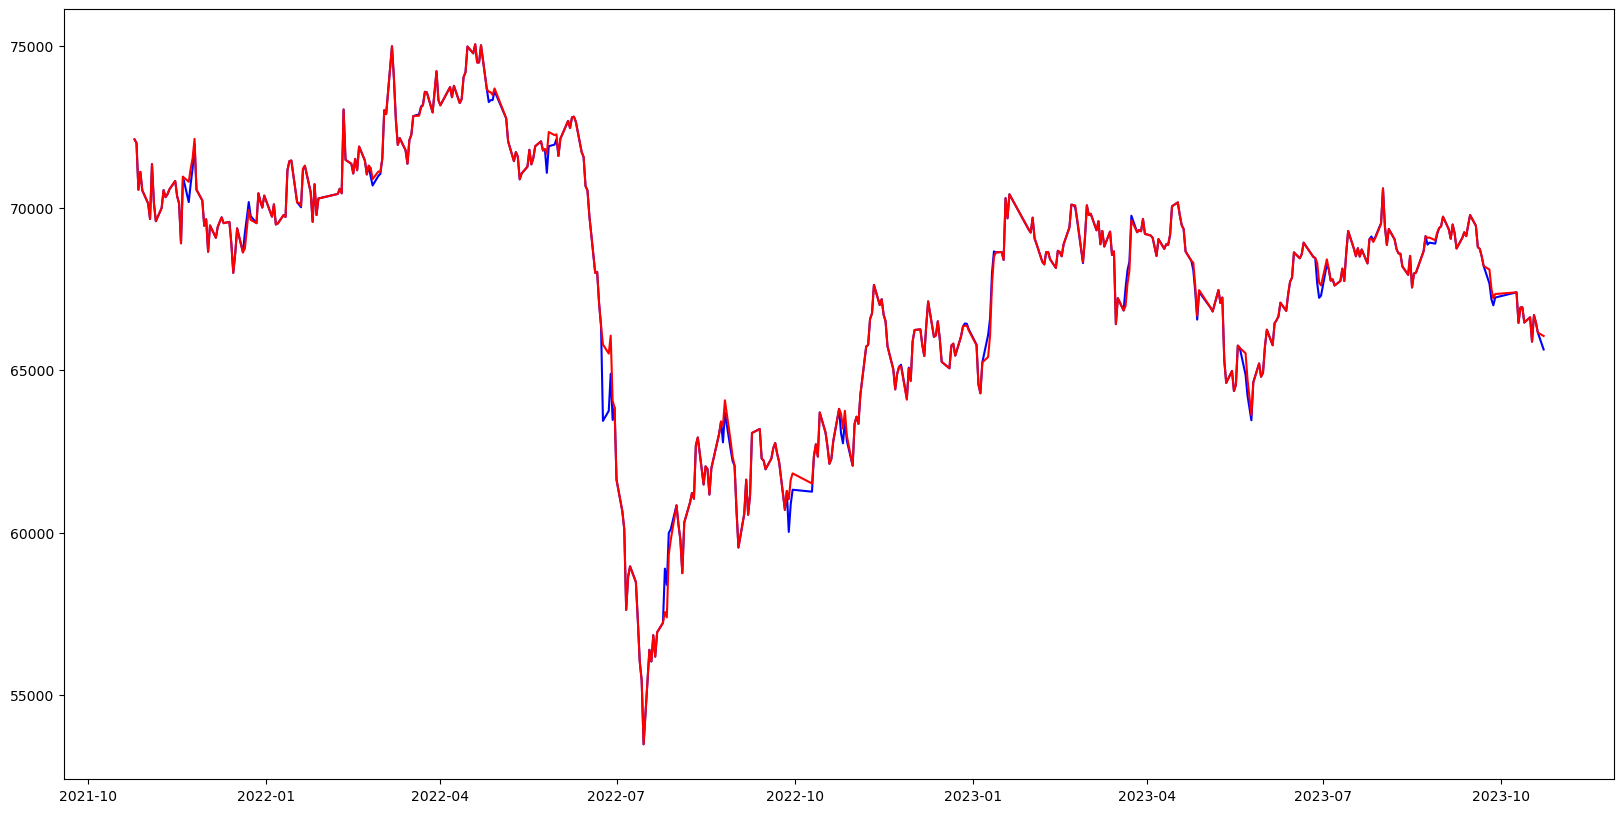

In [31]:
# 部分结果展示
plt.plot(price['CU'],color='b')
plt.plot(price_with_smoothness['CU'],color='r')
# 设置宽度
plt.gcf().set_size_inches(20, 10)
# 设置背景透明
plt.gcf().patch.set_facecolor('white')
# 保存
plt.savefig('CU.png')

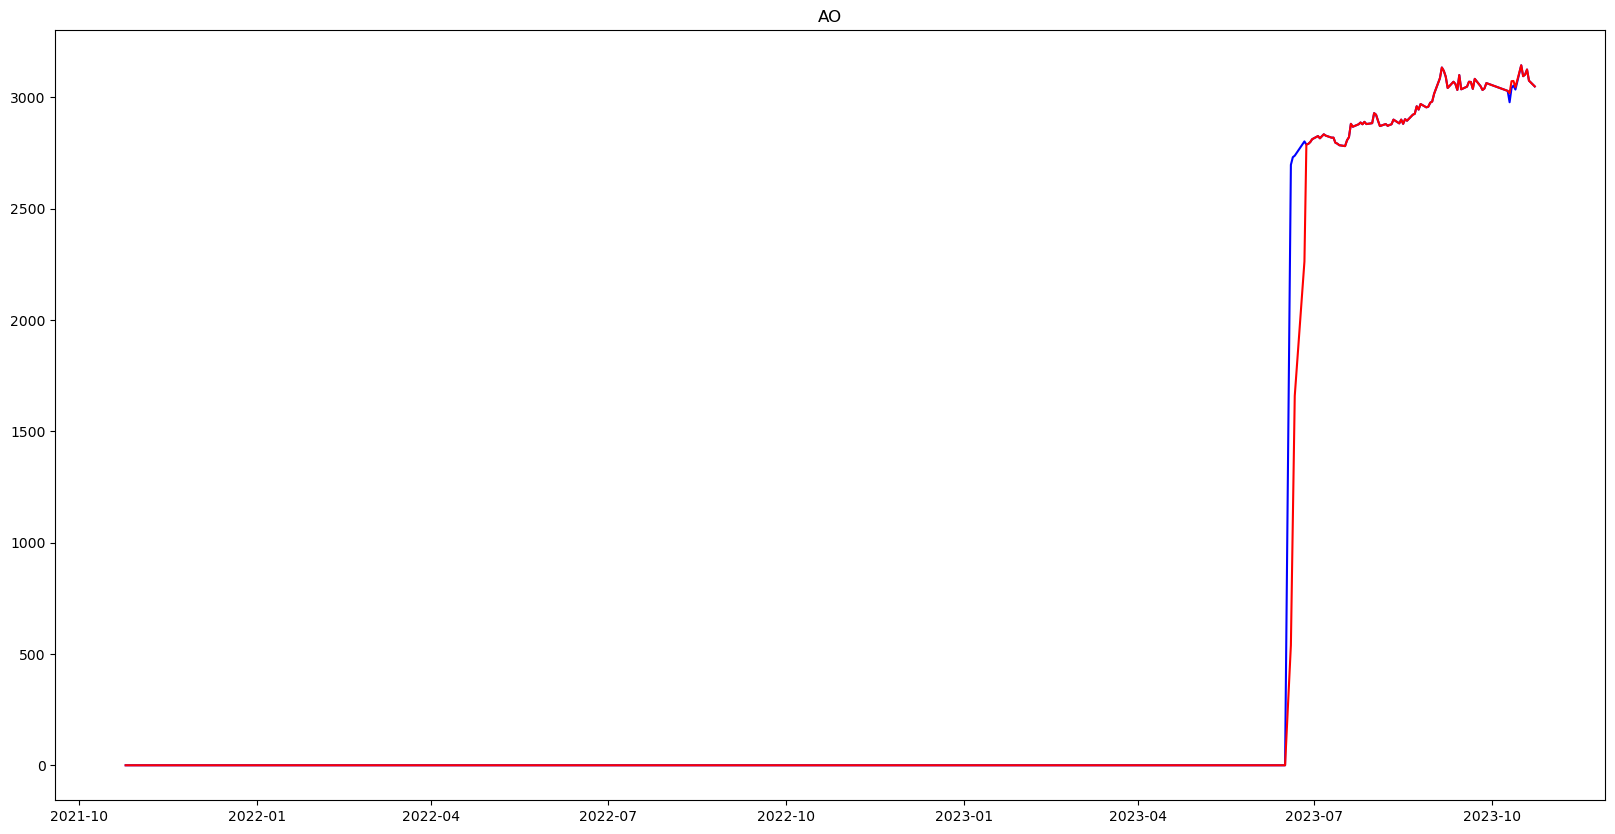

In [33]:
# 部分结果展示
plt.plot(price['AO'],color='b')
plt.plot(price_with_smoothness['AO'],color='r')
# 设置宽度
plt.gcf().set_size_inches(20, 10)
# 设置背景透明
plt.gcf().patch.set_facecolor('white')
# title
plt.title('AO')
# 保存
plt.savefig('AO.png')